In [27]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
from re import findall
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
base_url = 'https://h1bdata.info/index.php?em=&job='
ds = ['Data+Scient&city=&year=']
data = []

In [4]:
def h1b_scraper():
    for i in range(2019,2023):
        for j in ds:
            year_urladd = str(i)
            job_urladd = j
            url = base_url+job_urladd+year_urladd
            response = requests.get(url)
            c = response.content
            soup = BeautifulSoup(c, 'html.parser')
            my_table = soup.find('table', attrs = {'class': 'tablesorter tablesorter-blue hasStickyHeaders'})
            for x in my_table.find_all('td'):
                data.append(x.get_text())
    return data

In [5]:
h1b_scraper()

['OPEN DATA GROUP INC',
 'DATA SCIENTIST',
 '51,860',
 'CHICAGO, IL',
 '02/28/2019',
 '08/21/2019',
 'BLINKAI TECHNOLOGIES INC',
 'DATA SCIENTIST',
 '59,340',
 'BOSTON, MA',
 '03/12/2019',
 '09/06/2019',
 'DSFEDERAL INC',
 'DATA SCIENTIST',
 '60,420',
 'ROCKVILLE, MD',
 '03/05/2019',
 '09/04/2019',
 'DSFEDERAL INC',
 'DATA SCIENTIST',
 '60,420',
 'ROCKVILLE, MD',
 '03/08/2019',
 '09/04/2019',
 'CYBERXDATA LLC',
 'DATA SCIENTIST',
 '62,000',
 'NEWTON, MA',
 '03/20/2019',
 '09/19/2019',
 'ADECCO GROUP NA/MODIS INC',
 'DATA SCIENTIST',
 '65,500',
 'DEARBORN, MI',
 '03/19/2019',
 '09/16/2019',
 'BELCAN ENGINEERING GROUP LLC',
 'DATA SCIENTIST',
 '66,000',
 'CHAMPAIGN, IL',
 '03/13/2019',
 '09/09/2019',
 'PIPER COMPANIES LLC',
 'DATA SCIENTIST',
 '66,000',
 'MCLEAN, VA',
 '03/21/2019',
 '09/18/2019',
 'JACKPOCKET INC',
 'DATA SCIENTIST',
 '67,000',
 'NEW YORK, NY',
 '02/13/2019',
 '07/01/2019',
 'BELCAN ENGINEERING GROUP LLC',
 'DATA SCIENTIST',
 '70,000',
 'CHAMPAIGN, IL',
 '03/12/2019',
 

In [8]:
len(data)

79926

In [7]:
data = [ x for x in data if "\n" not in x ]

In [79]:
df = pd.DataFrame(np.array(data).reshape(13321,6),\
                  columns = ['company', 'role','salary', 'city','submitdate', 'startdate'])
df

,company,role,salary,city,submitdate,startdate
0,OPEN DATA GROUP INC,DATA SCIENTIST,"51,860","CHICAGO, IL",02/28/2019,08/21/2019
1,BLINKAI TECHNOLOGIES INC,DATA SCIENTIST,"59,340","BOSTON, MA",03/12/2019,09/06/2019
2,DSFEDERAL INC,DATA SCIENTIST,"60,420","ROCKVILLE, MD",03/05/2019,09/04/2019
3,DSFEDERAL INC,DATA SCIENTIST,"60,420","ROCKVILLE, MD",03/08/2019,09/04/2019
4,CYBERXDATA LLC,DATA SCIENTIST,"62,000","NEWTON, MA",03/20/2019,09/19/2019
...,...,...,...,...,...,...
13316,CENTER FOR CREATIVE LEADERSHIP,DATA SCIENTIST-LEADERSHIP ANALYTICS,"124,800","GREENSBORO, NC",02/28/2022,04/01/2022
13317,TEMPUS LABS INC,DATA SCIENTIST-OUTSIGHTS,"130,000","NEW YORK, NY",02/11/2022,08/10/2022
13318,CUMMINS INC,DATA SCIENTIST-SENIOR,"87,235","COLUMBUS, IN",02/15/2022,02/28/2022
13319,POINT72 LP,DATA SCIENTIST. MI DATA - ANALYTICS,"159,619","NEW YORK, NY",02/01/2022,04/18/2022


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13321 entries, 0 to 13320
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company     13321 non-null  object
 1   role        13321 non-null  object
 2   salary      13321 non-null  object
 3   city        13321 non-null  object
 4   submitdate  13321 non-null  object
 5   startdate   13321 non-null  object
dtypes: object(6)
memory usage: 624.5+ KB


In [113]:
df = df.loc[~(df['role'].str.contains('MANAGER'))]

In [81]:
df['salary'] = [x.replace(',', '') for x in df.salary]
df['salary'] = df['salary'].astype(int)

In [123]:
df.submitdate = pd.to_datetime(df.submitdate)
df.startdate = pd.to_datetime(df.startdate).dt.year

In [83]:
df[['city', 'state']] = df['city'].str.split(',',1, expand = True)
df = df.loc[~(df['city'].str.split().str.len()>=4)]
df.loc[df['city'].str.contains('NEW YORK'), ['city']] = 'NEW YORK'
df['state'] = [x.strip()[-2:] for x in df['state']]

/Users/shivi/myenv1/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/shivi/myenv1/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


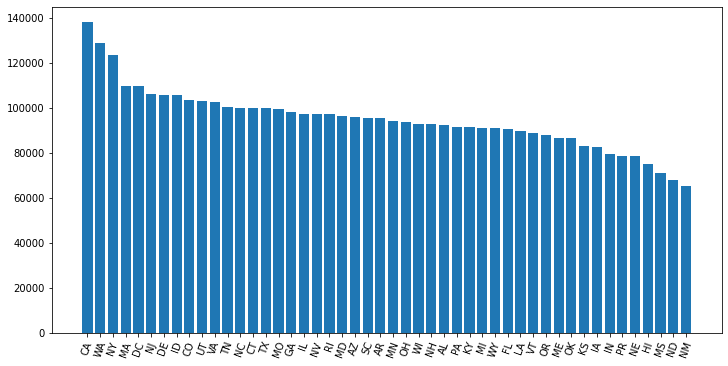

In [103]:
state_mean = df[['state', 'salary']].groupby('state').mean().reset_index()
state_mean = state_mean.sort_values('salary', ascending = False).reset_index(drop = True)


fig = plt.figure(figsize = [12,6])
plt.bar(state_mean['state'], state_mean['salary'])
plt.xticks(rotation = 70)
plt.show()

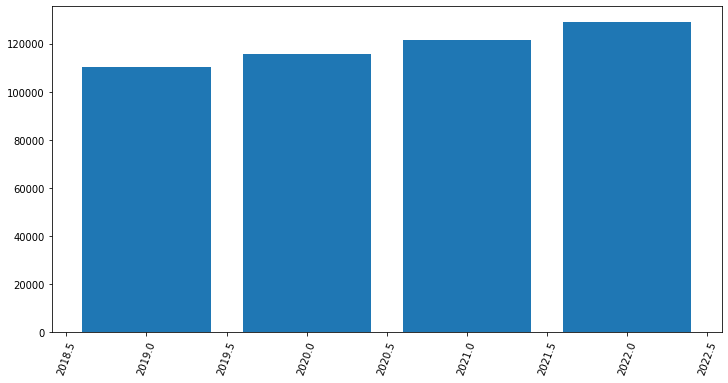

In [127]:
year_mean = df[['startdate', 'salary']].groupby('startdate').mean().reset_index()
year_mean = year_mean.sort_values('salary', ascending = False).reset_index(drop = True)


fig = plt.figure(figsize = [12,6])
plt.bar(year_mean['startdate'], year_mean['salary'])
plt.xticks(rotation = 70)
plt.show()

In [126]:
year_mean

,submitdate,salary
0,2019-09-13,260000.0
1,2021-11-21,240000.0
2,2019-10-19,227802.0
3,2021-07-03,206900.0
4,2020-12-05,205000.0
...,...,...
954,2020-04-18,74000.0
955,2021-02-14,72301.0
956,2019-02-02,72000.0
957,2021-11-26,67860.2
